Models Import

In [3]:
import joblib
from fastapi import FastAPI
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.metrics import classification_report
from sklearn.svm import SVR,SVC
from lazypredict.Supervised import LazyClassifier,LazyRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score, learning_curve



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR,SVC
import pandas as pd
from sklearn.datasets import make_classification
# Plot decision boundaries for each gamma value

df =  pd.read_excel('./PressureOutput.xlsx',sheet_name='Pressure')

X = df.iloc[:,:-1]   
y = df.iloc[:,-1]   

gamma_values = [0.1, 1, 10, 50, 100, 200]
plt.figure(figsize=(20, 10))
for i, gamma in enumerate(gamma_values, 1):
    # Train SVM with RBF kernel
    clf_rbf = SVC(kernel='rbf', gamma=gamma)
    clf_rbf.fit(X, y)

    # Create a mesh to plot decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = X.min() - 1, X.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X, X, c=y, cmap=plt.cm.Paired)
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()



Load Models

In [4]:
models = {
    "Support Vector Regression": SVR()     ,
    "Support Vector Classifier": SVC(kernel='rbf',gamma='auto',C=2) ,  
}

In [2]:
import pandas as pd

df =  pd.read_excel('./PressureOutput.xlsx',sheet_name='Pressure')
df.head(13)

,Junction1,Junction2,Junction 3,Junction4,Junction5,CONDITION
0,1.581192,1.376553,0.977607,0.871259,0.942224,0
1,1.520052,1.256248,0.857302,0.750954,0.821919,1
2,1.464330,1.145156,0.746211,0.639863,0.710827,1
3,1.412636,1.042092,0.643146,0.536798,0.607762,1
4,1.365045,0.947204,0.548259,0.441911,0.512875,1
5,1.321520,0.860418,0.461472,0.355124,0.426088,1
6,1.281933,0.781477,0.382531,0.276184,0.347148,1
7,1.246088,0.709996,0.311050,0.204702,0.275667,1
8,1.213748,0.645499,0.246554,0.140206,0.211170,1
9,1.184648,0.587460,0.188514,0.082167,0.153131,1


In [55]:
x = df.iloc[:,:-1]   
y = df.iloc[:,-1]   
x_train, x_test,y_train, y_test = train_test_split(x ,y ,random_state=104,test_size=0.50,shuffle=True) 





In [ ]:
h = .01  # step size in the mesh
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict using the trained SVM model over the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, edgecolors='k', marker='s', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()

In [56]:
# Initialize and train the classifier
classifier = SVC(kernel='rbf', gamma='auto', C=2)
classifier.fit(x_train, y_train)

# Predict on the test set
y_test_predict = classifier.predict(x_test)
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.95      1.00      0.97        71

    accuracy                           0.95        88
   macro avg       0.97      0.88      0.92        88
weighted avg       0.96      0.95      0.95        88



In [57]:
def predictLeak(P1,P2,P3,P4,P5):
    new_set = np.array([P1,P2,P3,P4,P5]).reshape(1, -1)
    scaler = StandardScaler().fit(x_train)
    new_set_scaled = scaler.transform(new_set)
    new_set_prediction = classifier.predict(new_set_scaled)
    if new_set_prediction == 1:
        print("Leak", new_set_prediction)
    else:
        print("No Leak", new_set_prediction)

In [58]:
predictLeak(0,0,0,0,0)

Leak [1]


MODEL'S PERFORMANCE VALIDATION


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings= True, custom_metric= None)
model,predictions = clf.fit(x_train,x_test,y_train,y_test)
force_row_wise= True
force_col_wise= True


In [9]:

result = pd.DataFrame(model)
result.head(70)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.52
LabelSpreading,1.00,1.00,1.00,1.00,0.02
XGBClassifier,1.00,1.00,1.00,1.00,0.37
SGDClassifier,1.00,1.00,1.00,1.00,0.03
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.19
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.08
LogisticRegression,1.00,1.00,1.00,1.00,0.02
BaggingClassifier,1.00,1.00,1.00,1.00,0.08


In [18]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    #_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
    print("""{:} \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.4f}""".format(
            model,np.sqrt(mean_squared_error(y_test, y_test_predict)),mean_squared_error(y_test, y_test_predict),
            mean_absolute_error(y_test, y_test_predict), r2_score(y_test, y_test_predict)))
    
    print()

    


Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression() 	 0.48 		 0.23 		0.14 		-0.6878

Model			 RMSE 		 MSE 		 MAE 		 R2
SVR() 	 0.14 		 0.02 		0.08 		0.8553

Model			 RMSE 		 MSE 		 MAE 		 R2
SVC(C=2, gamma='auto') 	 0.15 		 0.02 		0.02 		0.8301

Model			 RMSE 		 MSE 		 MAE 		 R2
LogisticRegression() 	 0.00 		 0.00 		0.00 		1.0000



FEATURE CORRELATION MAP

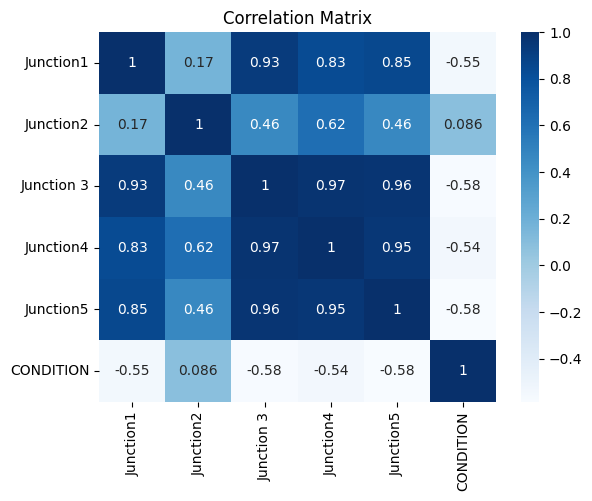

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,cmap='Blues',annot=True)
plt.title('Correlation Matrix')
plt.show()

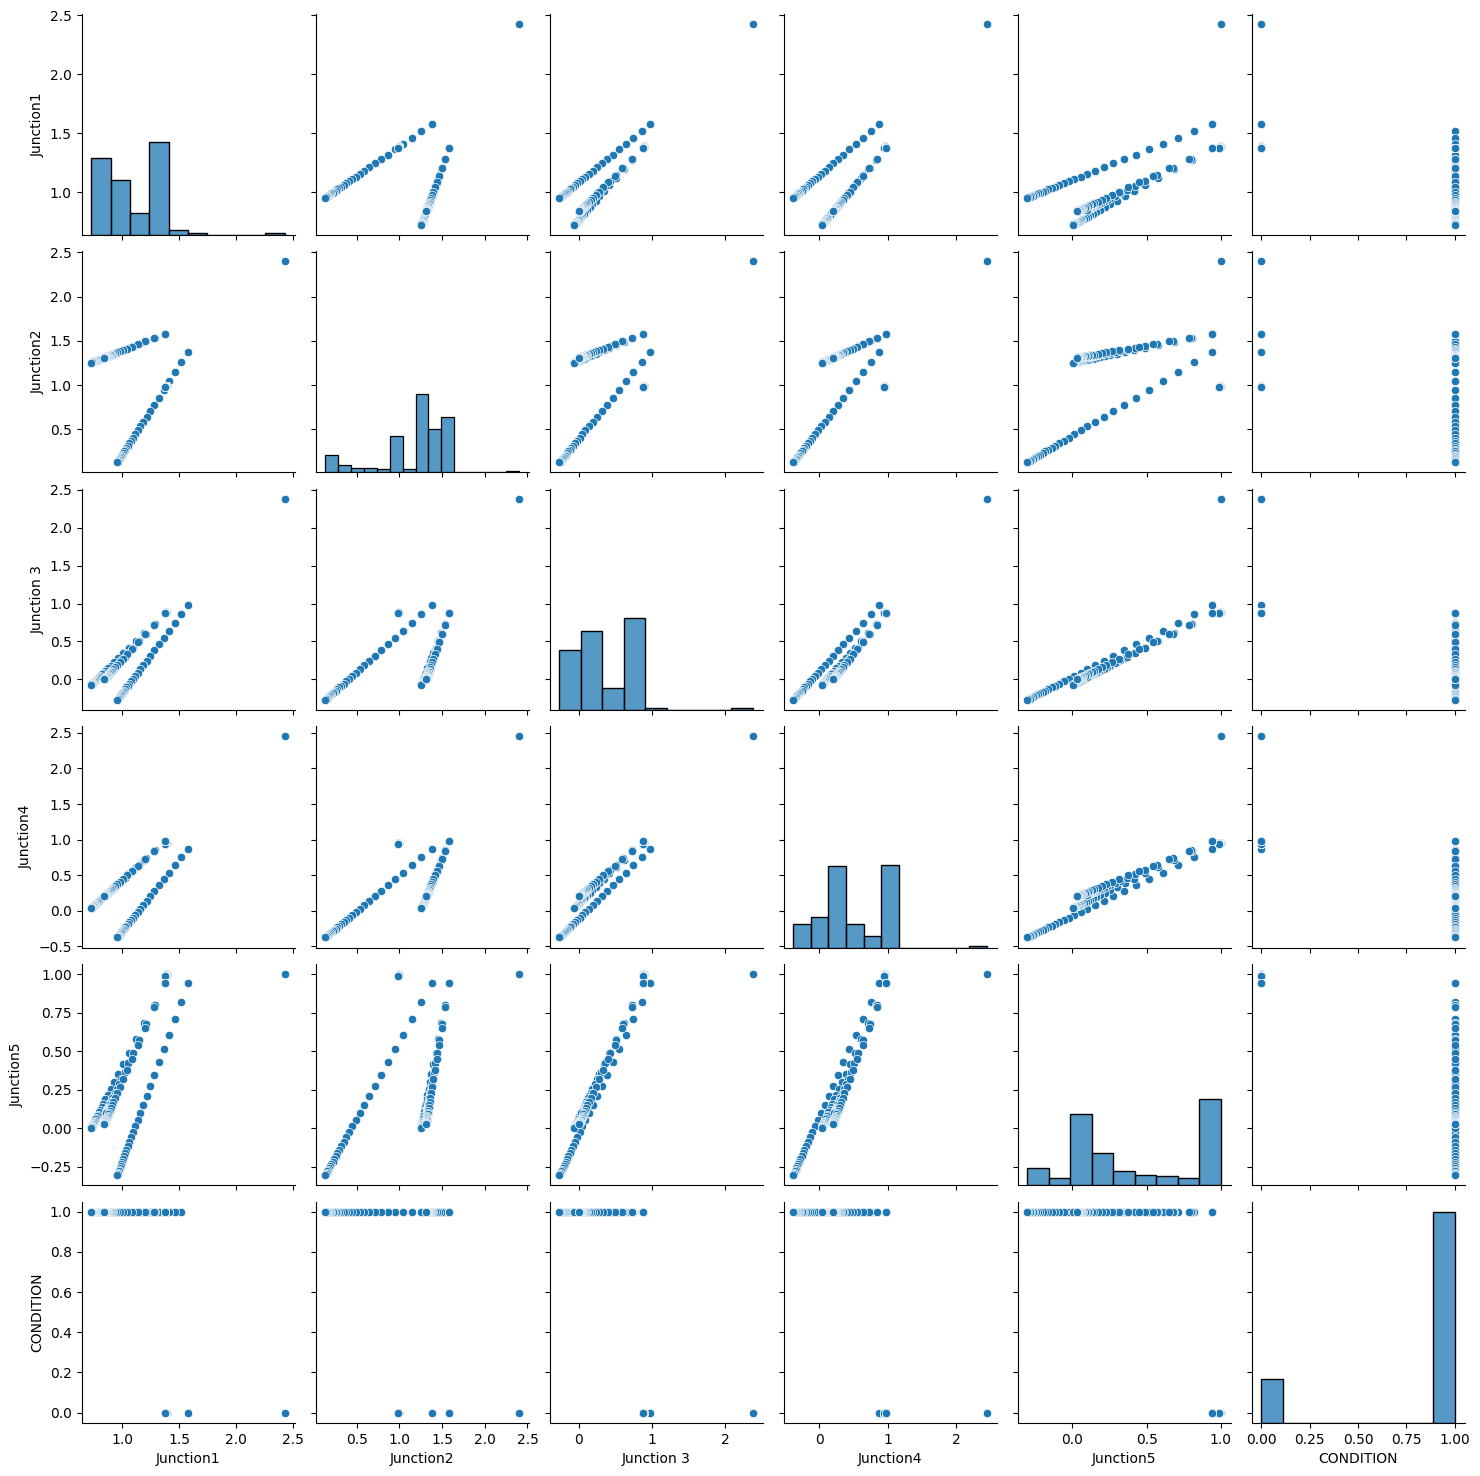

In [84]:
sns.pairplot(df)
plt.show()

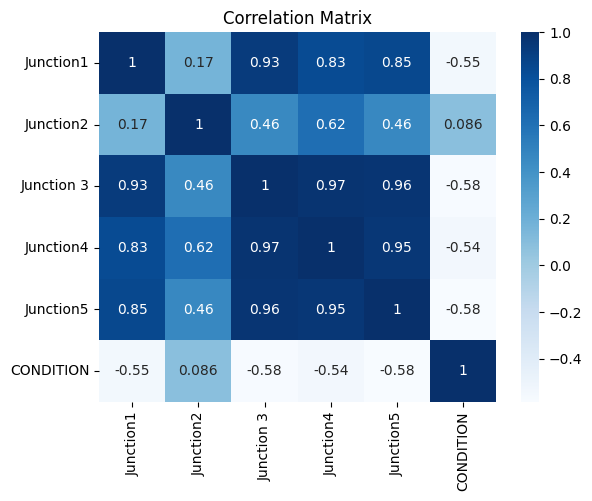

In [97]:

#correlation_matrix = df.corr()[['Junction 3']].sort_values(by='Junction 3', ascending=False)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,cmap='Blues',annot=True)
plt.title('Correlation Matrix')
plt.show()

CONFUSION MATRIX

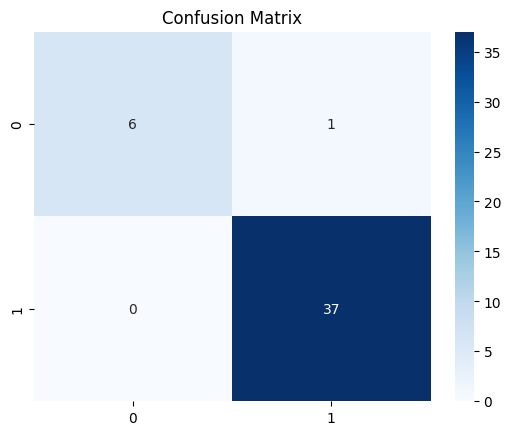

In [75]:
y_test_predict = classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_test_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

TRAINING, LEARNING CURVES

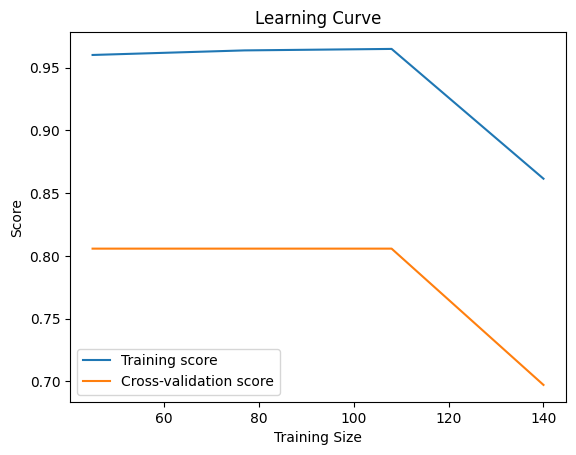

In [48]:
train_sizes, train_scores, test_scores = learning_curve(classifier, x, y, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

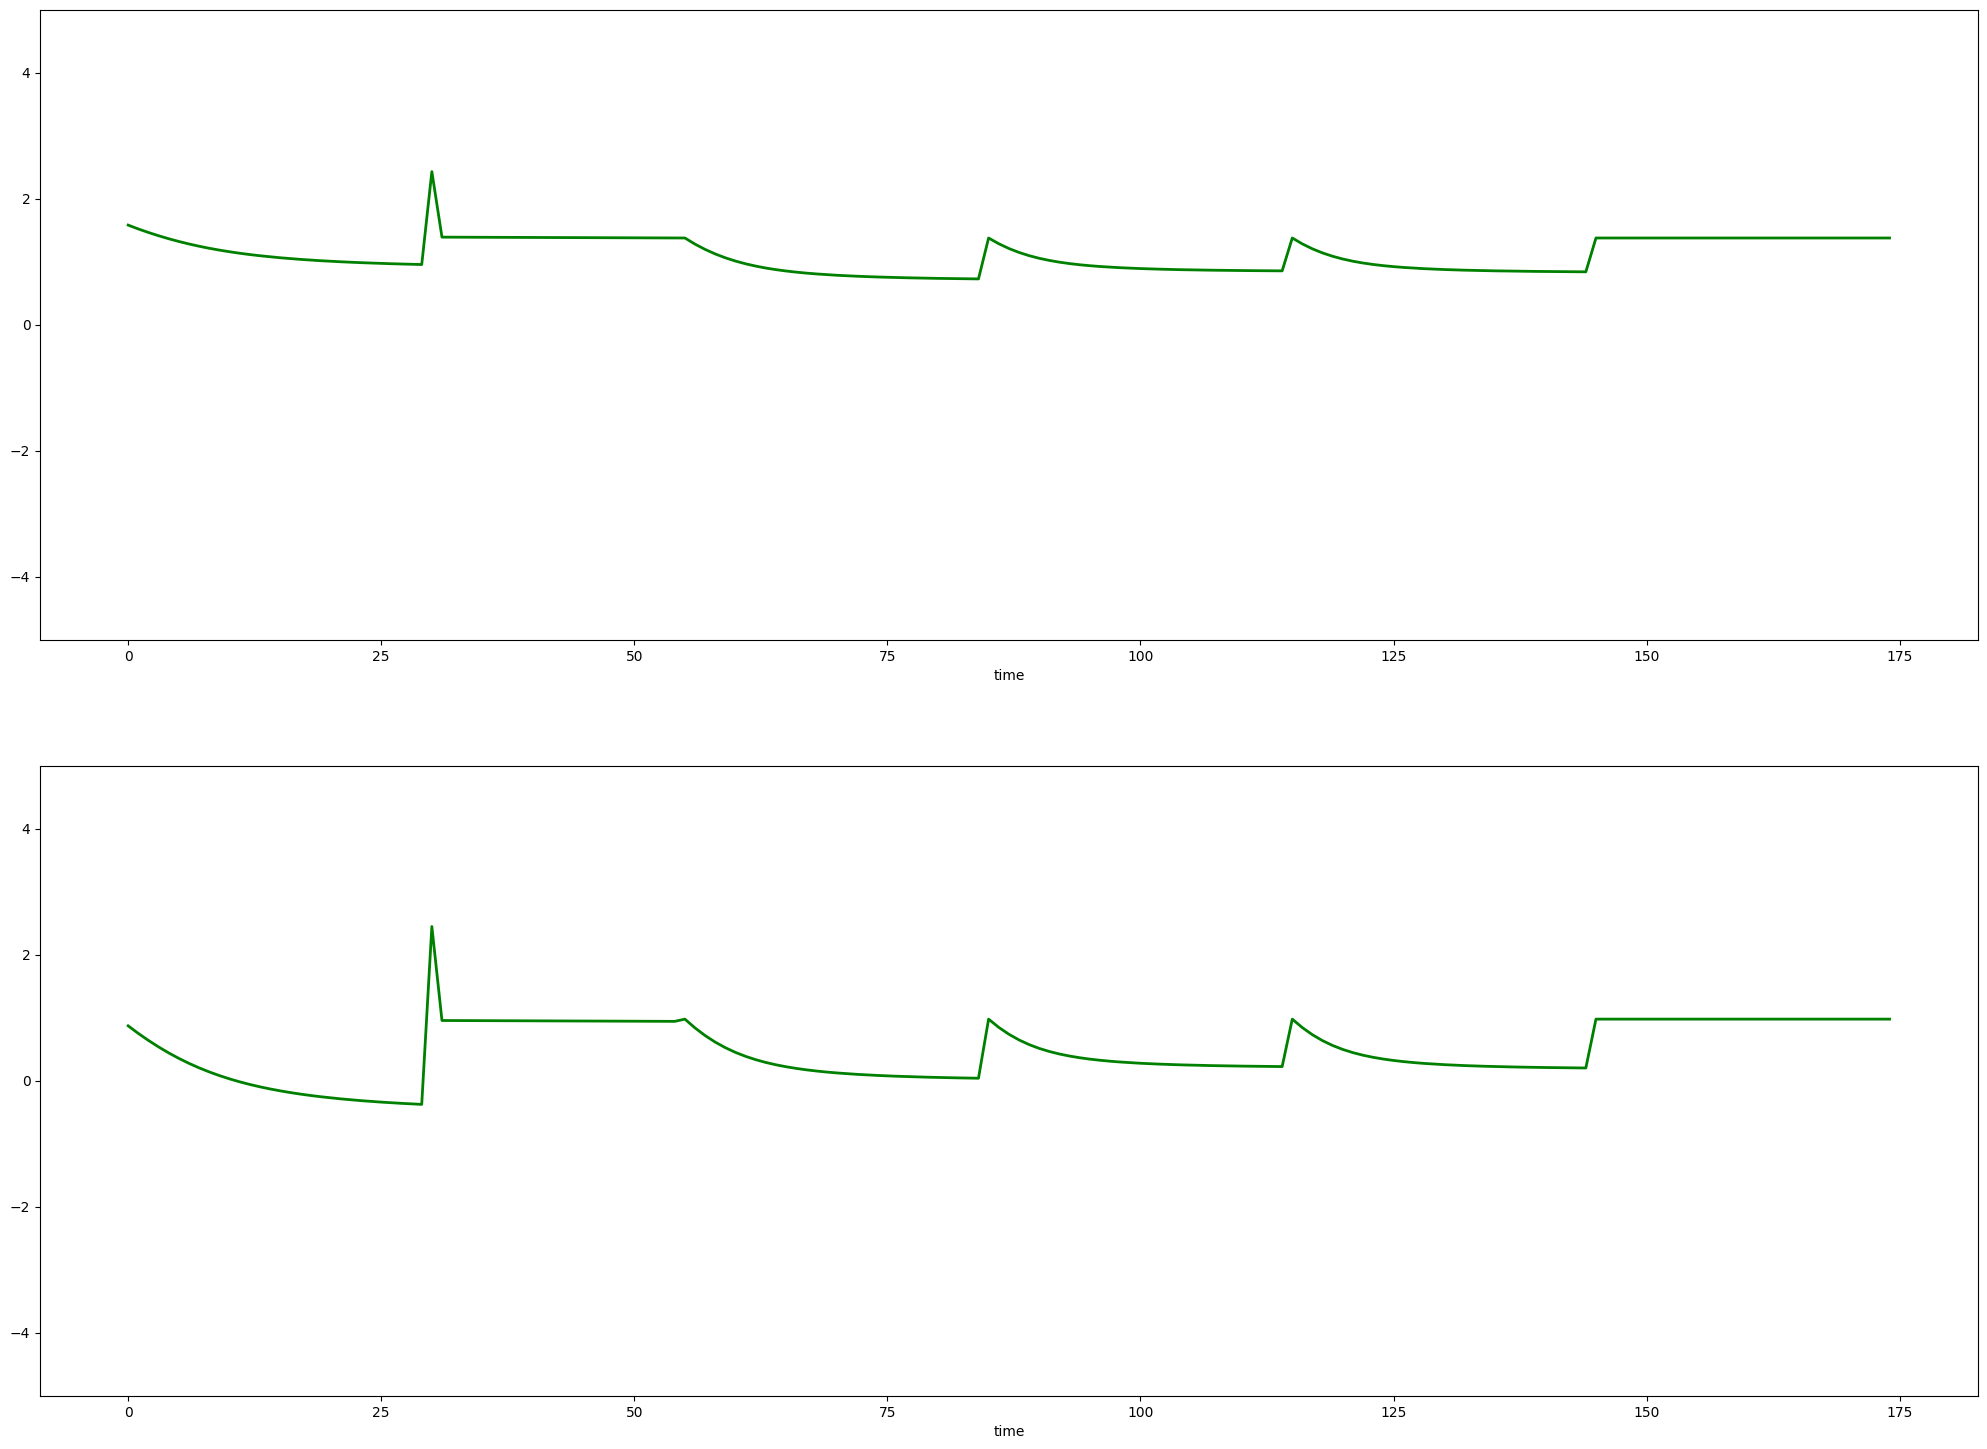

In [16]:
fig, axes = plt.subplots(figsize=(25,18),nrows=2,ncols=1) 
#velocityTimeFig = plt.figure()
#axes = velocityTimeFig.add_axes([0.1,0.1,2,1])
axes[0].set_xlabel('time')
axes[0].set_ylim([-5,5])
axes[1].set_xlabel('time')
axes[1].set_ylim([-5,5])



axes[0].plot(df['Junction1'],label='a(t)',linewidth = 2,color='green',linestyle ='-')
axes[1].plot(df['Junction4'],label='a(t)',linewidth = 2,color='green',linestyle ='-')
#axes[1].plot(df['delta t (sec)'],100*df['Velocity'],label='v(t)',linewidth = 2,color='blue',linestyle ='-')
#axes[2].plot(df['delta t (sec)'],400*df['Displacement'],label='u(t)',linewidth = 2,color='green',linestyle ='-')

SAVING THE LEAK CLASSIFIER SVM MODULE

In [59]:
joblib.dump(classifier,'leak_classifier.joblib')

['leak_classifier.joblib']

SEVER.PY

In [ ]:
model = joblib.load('leak_classifier.joblib')
class_names = np.array(['0','1'])

app = FastAPI()

@app.get('/')
def reed_root():
    return{'message':'Leak-detection-and-localisation API'}

@app.post('/predict')
def predict(data:dict):
    features = np.array(data['features']).reshape[1,-1]
    prediction = model.predict(features)
    class_name = class_names[prediction]
    return{'predicted_class':class_names}
